In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_df=pd.read_csv('CarPrice_Assignment.csv')
data_df.shape

(205, 26)

# understanding the data

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
data_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# cleaning data

### detecting nulls

In [5]:
df_null=data_df.isna().sum()
df_null

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### check duplicates

In [6]:
data_df.duplicated().value_counts()

False    205
dtype: int64

### detecting outliers

<AxesSubplot:>

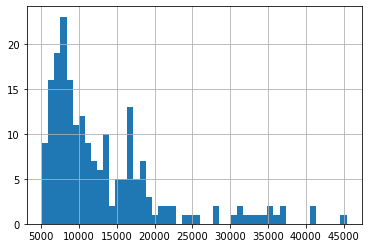

In [7]:
data_df['price'].hist(bins=50)


<AxesSubplot:xlabel='price'>

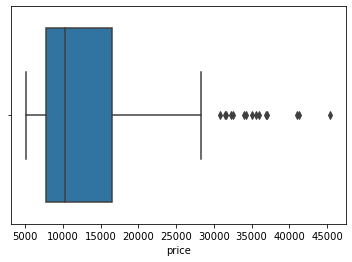

In [8]:
import seaborn as sns
sns.boxplot(x=data_df['price'])

In [9]:
data_df.shape

(205, 26)

### removing outliers using SPSS 

### importing the new CSV file

In [10]:
data_cleaned=pd.read_csv('carprice.csv')
data_cleaned

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
184,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
185,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
186,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [11]:
data_cleaned.shape

(188, 26)

### box plot after removing outliers

<AxesSubplot:xlabel='price'>

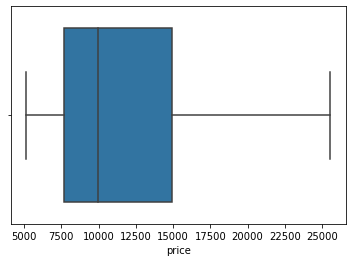

In [12]:
sns.boxplot(x=data_cleaned['price'])

<AxesSubplot:>

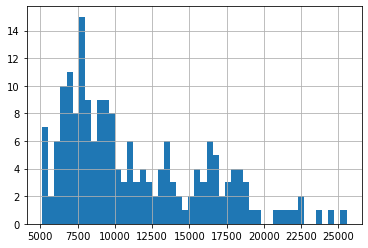

In [13]:
data_cleaned['price'].hist(bins=50)

### handling car name to be standard

In [29]:
data_cleaned['CarName'] = data_cleaned['CarName'].str.split(' ',expand=True)
data_cleaned['CarName'].unique()



array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'mazda', 'buick', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

### maxda:mazda  ,  Nissan:nissan  ,  toyouta:toyota  ,  vokswagen:volkswagen  ,  vw:volkswagen


In [16]:
data_cleaned["CarName"]=data_cleaned['CarName'].replace(to_replace =["maxda", "Nissan","toyouta","vokswagen","vw"], 
                            value =["mazda","nissan","toyota","volkswagen","volkswagen"])



In [17]:
data_cleaned['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'mazda', 'buick', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

### dropping Car ID column

In [15]:
data_cleaned=data_cleaned.drop(['car_ID'],axis=1)
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         188 non-null    int64  
 1   CarName           188 non-null    object 
 2   fueltype          188 non-null    object 
 3   aspiration        188 non-null    object 
 4   doornumber        188 non-null    object 
 5   carbody           188 non-null    object 
 6   drivewheel        188 non-null    object 
 7   enginelocation    188 non-null    object 
 8   wheelbase         188 non-null    float64
 9   carlength         188 non-null    float64
 10  carwidth          188 non-null    float64
 11  carheight         188 non-null    float64
 12  curbweight        188 non-null    int64  
 13  enginetype        188 non-null    object 
 14  cylindernumber    188 non-null    object 
 15  enginesize        188 non-null    int64  
 16  fuelsystem        188 non-null    object 
 1

# preparing data

### setting symboling to be from 1 to 7 to be analayzed using SPSS 

In [18]:
data_cleaned["symboling"]=data_cleaned['symboling'].replace(to_replace =[-3, -2,-1,0,1,2,3], 
                            value =[1,2,3,4,5,6,7])
data_cleaned["symboling"].head(10)

0    7
1    7
2    5
3    6
4    6
5    6
6    5
7    5
8    5
9    4
Name: symboling, dtype: int64

### separating the data into 2 data frames , one for categorical and the othe for numerical

In [19]:
cat_col = data_cleaned.select_dtypes(include=['object']).columns
num_col = data_cleaned.select_dtypes(exclude=['object']).columns
df_cat = data_cleaned[cat_col]
df_num = data_cleaned[num_col]


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,7,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,7,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,5,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,6,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,6,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,3,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
184,3,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
185,3,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
186,3,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


### exporting 3 csv files to show relationships between variables using SPSS (categorical data file ,numerical data file, cleaned data file)

In [20]:
df_cat.to_csv('df_cat.csv')
df_num.to_csv('df_num.csv')


In [21]:
data_cleaned.to_csv('data_cleaned.csv')

### we found that the variables (Wheel base,Horse power,Car length,Car width and Engine size) have relashionship with Price

### box plot visuals to the independent variables having relationship with price according to SPSS

<AxesSubplot:xlabel='wheelbase'>

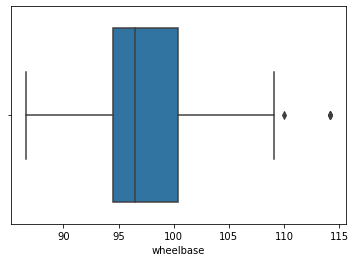

In [22]:
sns.boxplot(x=df_num['wheelbase'])


<AxesSubplot:xlabel='horsepower'>

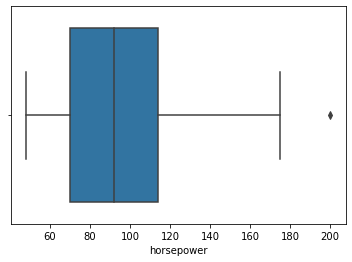

In [23]:
sns.boxplot(x=df_num['horsepower'])

<AxesSubplot:xlabel='carlength'>

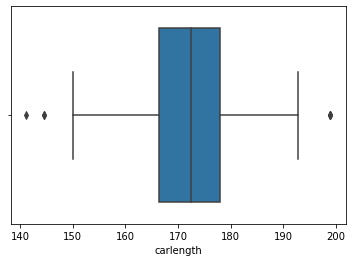

In [24]:
sns.boxplot(x=df_num['carlength'])

<AxesSubplot:xlabel='carwidth'>

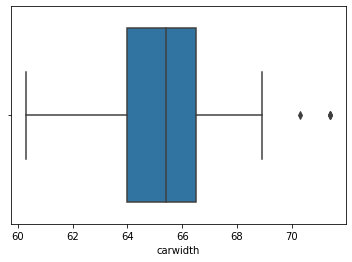

In [25]:
sns.boxplot(x=df_num['carwidth'])

<AxesSubplot:xlabel='enginesize'>

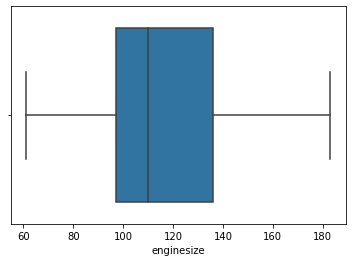

In [26]:
sns.boxplot(x=df_num['enginesize'])

### exporting a temporary csv file for the categorical data to deal with the categorical variables in SPSS

In [27]:
data_cleaned_temp=data_cleaned.copy()

In [28]:
data_cleaned_temp["carbody"]=data_cleaned_temp['carbody'].replace(to_replace =["convertible","hardtop","hatchback","sedan","wagon"], 
                            value =["1","2","3","4","5"])
data_cleaned_temp['carbody'] = data_cleaned_temp['carbody'].astype(int)
data_cleaned_temp["fueltype"]=data_cleaned_temp['fueltype'].replace(to_replace =["gas","diesel"], 
                            value =["0","1"])
data_cleaned_temp['fueltype'] = data_cleaned_temp['fueltype'].astype(int)
data_cleaned_temp["aspiration"]=data_cleaned_temp['aspiration'].replace(to_replace =["std","turbo"], 
                            value =["0","1"])
data_cleaned_temp['aspiration'] = data_cleaned_temp['aspiration'].astype(int)
data_cleaned_temp["cylindernumber"]=data_cleaned_temp['cylindernumber'].replace(to_replace =["two","three","four","five","six"], 
                            value =["1","2","3","4","5"])
data_cleaned_temp['cylindernumber'] = data_cleaned_temp['cylindernumber'].astype(int)
data_cleaned_temp["doornumber"]=data_cleaned_temp['doornumber'].replace(to_replace =["two","four"], 
                            value =["0","1"])
data_cleaned_temp['doornumber'] = data_cleaned_temp['doornumber'].astype(int)
data_cleaned_temp["enginetype"]=data_cleaned_temp['enginetype'].replace(to_replace =["ohc","dohc","ohcv","ohcf","rotor","l"], 
                            value =["1","2","3","4","5","6"])
data_cleaned_temp['enginetype'] = data_cleaned_temp['enginetype'].astype(int)
data_cleaned_temp.to_csv('data_cleaned_temp.csv')